In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import sys
import susi
from sklearn_som.som import SOM
from sklearn.model_selection import train_test_split
from minisom2 import MiniSom
# sys.path.insert(0,'minisom')
# from minisom2 import MiniSom

In [2]:
import random

def read_imgs(folder_path):
    data = [[], []]
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            im = cv2.imread(os.path.join(subdir, file), 0)
            data[0].append(im.flatten())
            data[1].append(int(subdir[-1]))
    return np.array(data[0]), np.array(data[1])

X, y = read_imgs("../HW1/MNIST Dataset")
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [4]:
wta_som = MiniSom(10, 1, 784, competition_form="wta", learning_rate=0.5)
wta_som.random_weights_init(X_train)
wta_som.train(X_train, 3000, use_epochs=True, random_order=True, verbose=True)

 [ 54000000 / 54000000 ] 100% - 0:00:00 left 

g:\Arshad Projects\Term 2\NN\Project\minisom\minisom2.py:586: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 1978.5459640530837


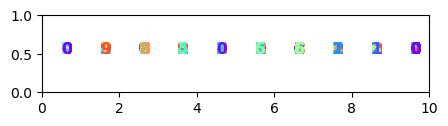

In [6]:
plt.figure(figsize=(5, 1))
wta_wmap = {}
im = 0
for x, t in zip(X_train, y_train):  # scatterplot
    w = wta_som.winner(x)
    wta_wmap[w] = im
    plt.text(w[0]+.5,  w[1]+.5, str(t), color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, wta_som.get_weights().shape[0], 0,  wta_som.get_weights().shape[1]])
plt.show()

In [9]:
print(wta_som.get_weights().shape)

(10, 1, 784)


In [5]:
import pickle
# saving the som in the file som.p
with open('../HW1/wta_som.p', 'wb') as outfile:
    pickle.dump(wta_som, outfile)